# Example TinyImagenet 200

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_1.4_t_6/checkpoints/records.pkl', '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_2_t_8/checkpoints/records.pkl']
['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_1.4_t_6/checkpoints/model.pth', '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_2_t_8/checkpoints/model.pth']


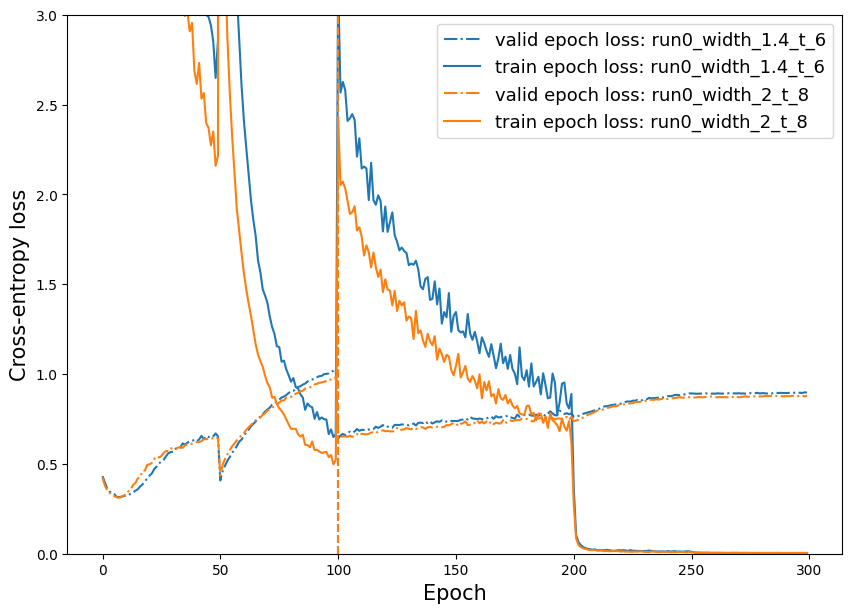

run0_width_1.4_t_6: test accuracy = 30.510000228881836
run0_width_2_t_8: test accuracy = 32.119998931884766


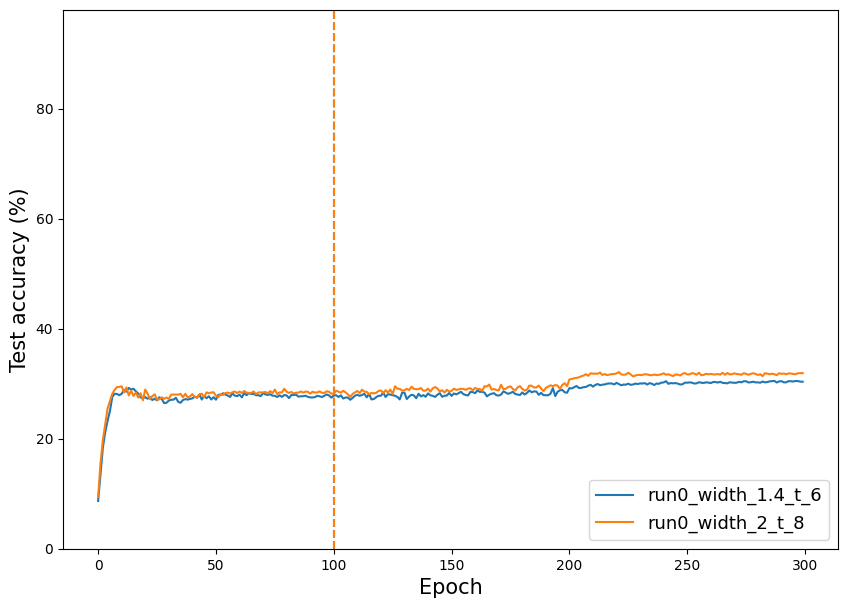

In [2]:
%matplotlib inline

# exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/'
exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2tiny/'
# models_list = ["debug"]
models_list = ["run0_width_1.4_t_6", "run0_width_2_t_8"]

records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [3]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_width_1.4_t_6
Number of parameters summary:
    Total: 3619441 
    Max per branch: 3619441 
    Min per branch: 3619441 
    Average per branch: 3619441.0

Model: run0_width_2_t_8
Number of parameters summary:
    Total: 9378865 
    Max per branch: 9378865 
    Min per branch: 9378865 
    Average per branch: 9378865.0


In [4]:
from models import Tree
from utils import load_tree_model
import ptflops

# model_path = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_1.4_t_6/checkpoints/model.pth'
model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/tiny-imagenet/mbv2/run0_width_2_t_8/checkpoints/model.pth"
model = load_tree_model(model_path)


flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  12.66 M, 100.000% Params, 25.58 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    12.66 M, 100.000% Params, 25.58 MMac, 100.000% MACs, 
    (0): Sequential(
      12.66 M, 100.000% Params, 25.58 MMac, 100.000% MACs, 
      (transform): Root_MBV2(
        9.11 M, 71.944% Params, 25.31 MMac, 98.944% MACs, 
        (features): Sequential(
          9.11 M, 71.944% Params, 25.31 MMac, 98.944% MACs, 
          (0): Sequential(
            928, 0.007% Params, 245.76 KMac, 0.961% MACs, 
            (0): Conv2d(864, 0.007% Params, 221.18 KMac, 0.865% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, 0.001% Params, 16.38 KMac, 0.064% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(0, 0.000% Params, 8.19 KMac, 0.032% MACs, inplace=True)
          )
          (1): InvertedResidual(
            896, 0.007% Params, 237.57 KMac, 0.929% MACs, 
            (conv): Sequential(
     

/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Tree(
  1.06 M, 100.000% Params, 15.63 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    1.06 M, 100.000% Params, 15.63 MMac, 100.000% MACs, 
    (0): Sequential(
      1.06 M, 100.000% Params, 15.63 MMac, 100.000% MACs, 
      (transform): Root_MBV2light(
        828.69 k, 78.473% Params, 15.61 MMac, 99.864% MACs, 
        (features): Sequential(
          828.69 k, 78.473% Params, 15.61 MMac, 99.864% MACs, 
          (0): InvertedResidual(
            113, 0.011% Params, 118.78 KMac, 0.760% MACs, 
            (conv): Sequential(
              113, 0.011% Params, 118.78 KMac, 0.760% MACs, 
              (0): Conv2d(27, 0.003% Params, 27.65 KMac, 0.177% MACs, 3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
              (1): BatchNorm2d(6, 0.001% Params, 6.14 KMac, 0.039% MACs, 3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(0, 0.000% Params, 3.07 KMac, 0.020% MACs, inplace=True)
              (3): Conv2d(